In [17]:
import cv2
import matplotlib.pyplot as plt
config_file="/content/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="/content/frozen_inference_graph.pb"
model=cv2.dnn_DetectionModel(frozen_model,config_file)
classLabels=[]
file_name="/content/labels.txt"
with open(file_name,'rt') as fpt:
 classLabels=fpt.read().rstrip('\n').split('\n')
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [15]:
import cv2

80


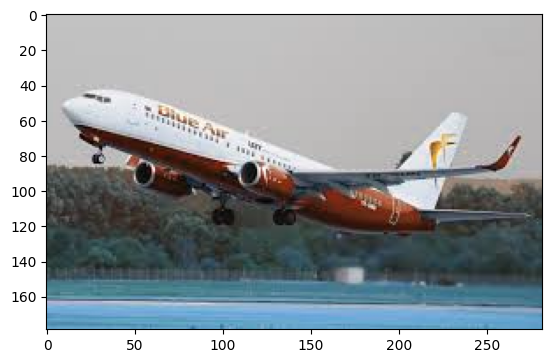

In [22]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127,5,127.5))
model.setInputSwapRB(True)
img=cv2.imread("/content/air.jpeg")
plt.imshow(img)
print(len(classLabels))

In [23]:
ClassIndex,Confidence,bbox=model.detect(img,confThreshold=0.5)
print(ClassIndex)
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),Confidence.flatten(),bbox):
 cv2.rectangle(img,boxes,(255,0,0),2)
 cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+10),font,fontScale=font_scale,color=(0))

[5]


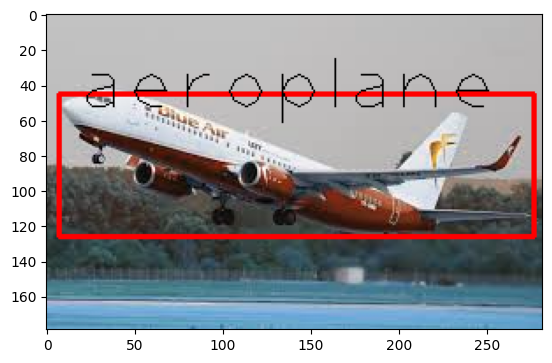

In [24]:
plt.imshow(img)